# Initialization

In [26]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import glob
import os
from astropy.constants import G, M_sun, au, M_earth

In [40]:
filename_collisions = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/13/Collisionsclement.dat' # /!\ path to be changed
collisions = np.genfromtxt(filename_collisions, dtype='str')
time = collisions[:,0].astype(float)
# Index of body i
idx_i = collisions[:,1].astype(float)
# Index of body j
idx_j = collisions[:,13].astype(float)
# Mass of body j
mass_j = collisions[:,14].astype(float) * M_sun.value / M_earth.value
Earth_planetesimals_idx = np.array([])
Earth_planetesimals_idx = np.append(Earth_planetesimals_idx, 7.0)  # /!\ number to be changed
pl_time = np.array([])
pl_time = np.append(pl_time, 0.0)
pl_mass = np.array([])
pl_mass = np.append(pl_mass, 0.064)
spl_time = np.array([])
spl_mass = np.array([])
for i in range(len(idx_i)):
   # if collisions with the Earth analog (10 is the index of Earth analog)
    if idx_i[i] == 7 and idx_j[i] < 2040:  # /!\ first number to be changed
        Earth_planetesimals_idx = np.append(Earth_planetesimals_idx, idx_j[i])
        pl_time = np.append(pl_time, time[i])
        pl_mass = np.append(pl_mass, mass_j[i])
    if idx_i[i] == 7 and idx_j[i] < 2040 and mass_j[i] <= 0.01:  # /!\ first number to be changed
        spl_time = np.append(spl_time, time[i])
        spl_mass = np.append(spl_mass, mass_j[i])
print(len(Earth_planetesimals_idx))
print(len(spl_time))
#print(np.round(pl_time/1e6, 2))
#print(pl_mass)

169
162


In [41]:
filename_initialdat = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/13/initial.dat' # /!\ path to be changed
initial = np.genfromtxt(filename_initialdat, dtype='str')
initial_a = initial[:,2].astype(float)
initial_e = initial[:,3].astype(float)
print(initial_e)

[0.0901196  0.22406    0.0463419  ... 0.01017061 0.0048047  0.00368885]


In [42]:
asteroid_idx = np.array([])
as_time = np.array([])
as_mass = np.array([])
as_a = np.array([])
as_e = np.array([])
for i in range(len(idx_i)):
    for k in range(len(Earth_planetesimals_idx)):
        ep = int(Earth_planetesimals_idx[k])
        if idx_i[i] == ep and idx_j[i] >= 2040:  # /!\ number to be changed
            asteroid_idx = np.append(asteroid_idx, idx_j[i])
            as_time = np.append(as_time, time[i])
            as_mass = np.append(as_mass, mass_j[i])
            int_idx = int(idx_j[i])
            as_a = np.append(as_a, initial_a[int_idx])
            as_e = np.append(as_e, initial_e[int_idx])
print(len(asteroid_idx))
#print(len(asteroid_idx)*1.25e-4)
#print(len(asteroid_idx)*1.25e-4/0.271)
#print(np.round(as_time/1e6, 2))
#print(as_mass)
#print(as_e)

107


In [43]:
# Accretion of the Earth
Earth_total_idx = np.array([])
Earth_total_idx = np.append(Earth_total_idx, 7.0)  # /!\ number to be changed
Etot_time = np.array([])
Etot_time = np.append(Etot_time, 0.0)
Etot_mass = np.array([])
Etot_mass = np.append(Etot_mass, 0.064)
for i in range(len(idx_i)):
   # if collisions with the Earth analog (10 is the index of Earth analog)
    if idx_i[i] == 7:  # /!\ first number to be changed
        Earth_total_idx = np.append(Earth_total_idx, idx_j[i])
        Etot_time = np.append(Etot_time, time[i])
        Etot_mass = np.append(Etot_mass, mass_j[i])
print(len(Earth_total_idx))

228


# Plots

<IPython.core.display.Javascript object>


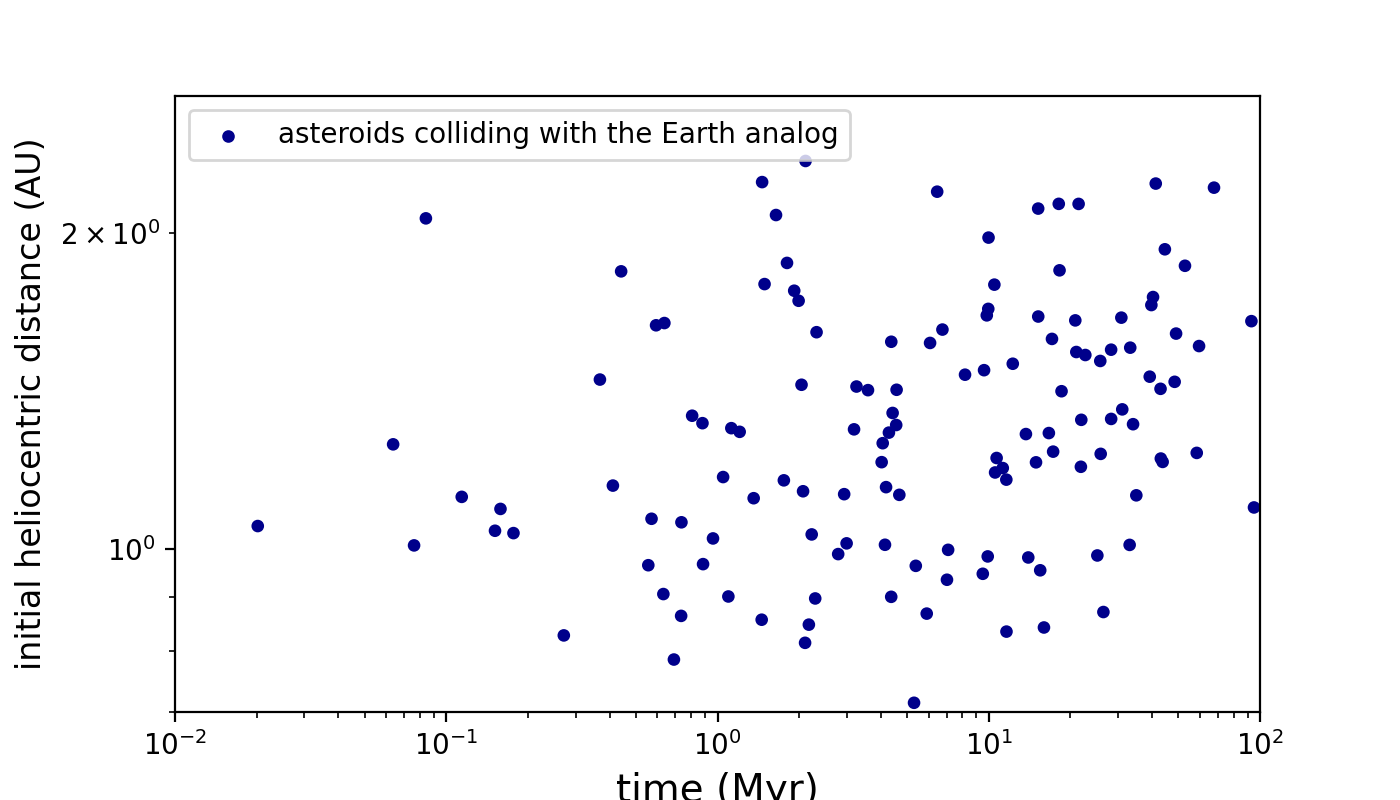

In [31]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_xlabel('time (Myr)', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('initial heliocentric distance (AU)', fontsize=12)
ax.set_xlim(0.01, 100)
ax.set_ylim(0.7, 2.7)
ax.scatter(as_time/1e6, as_a, c = 'darkblue', s=1e5*as_mass, label = "asteroids colliding with the Earth analog")
ax.legend(loc='upper left')
plt.savefig('/Users/sarahjoiret/Desktop/heldist_a1.pdf', dpi=1000,bbox_inches='tight')
# There is no trend here but it is normal as we only consider C)type asteroids

<IPython.core.display.Javascript object>


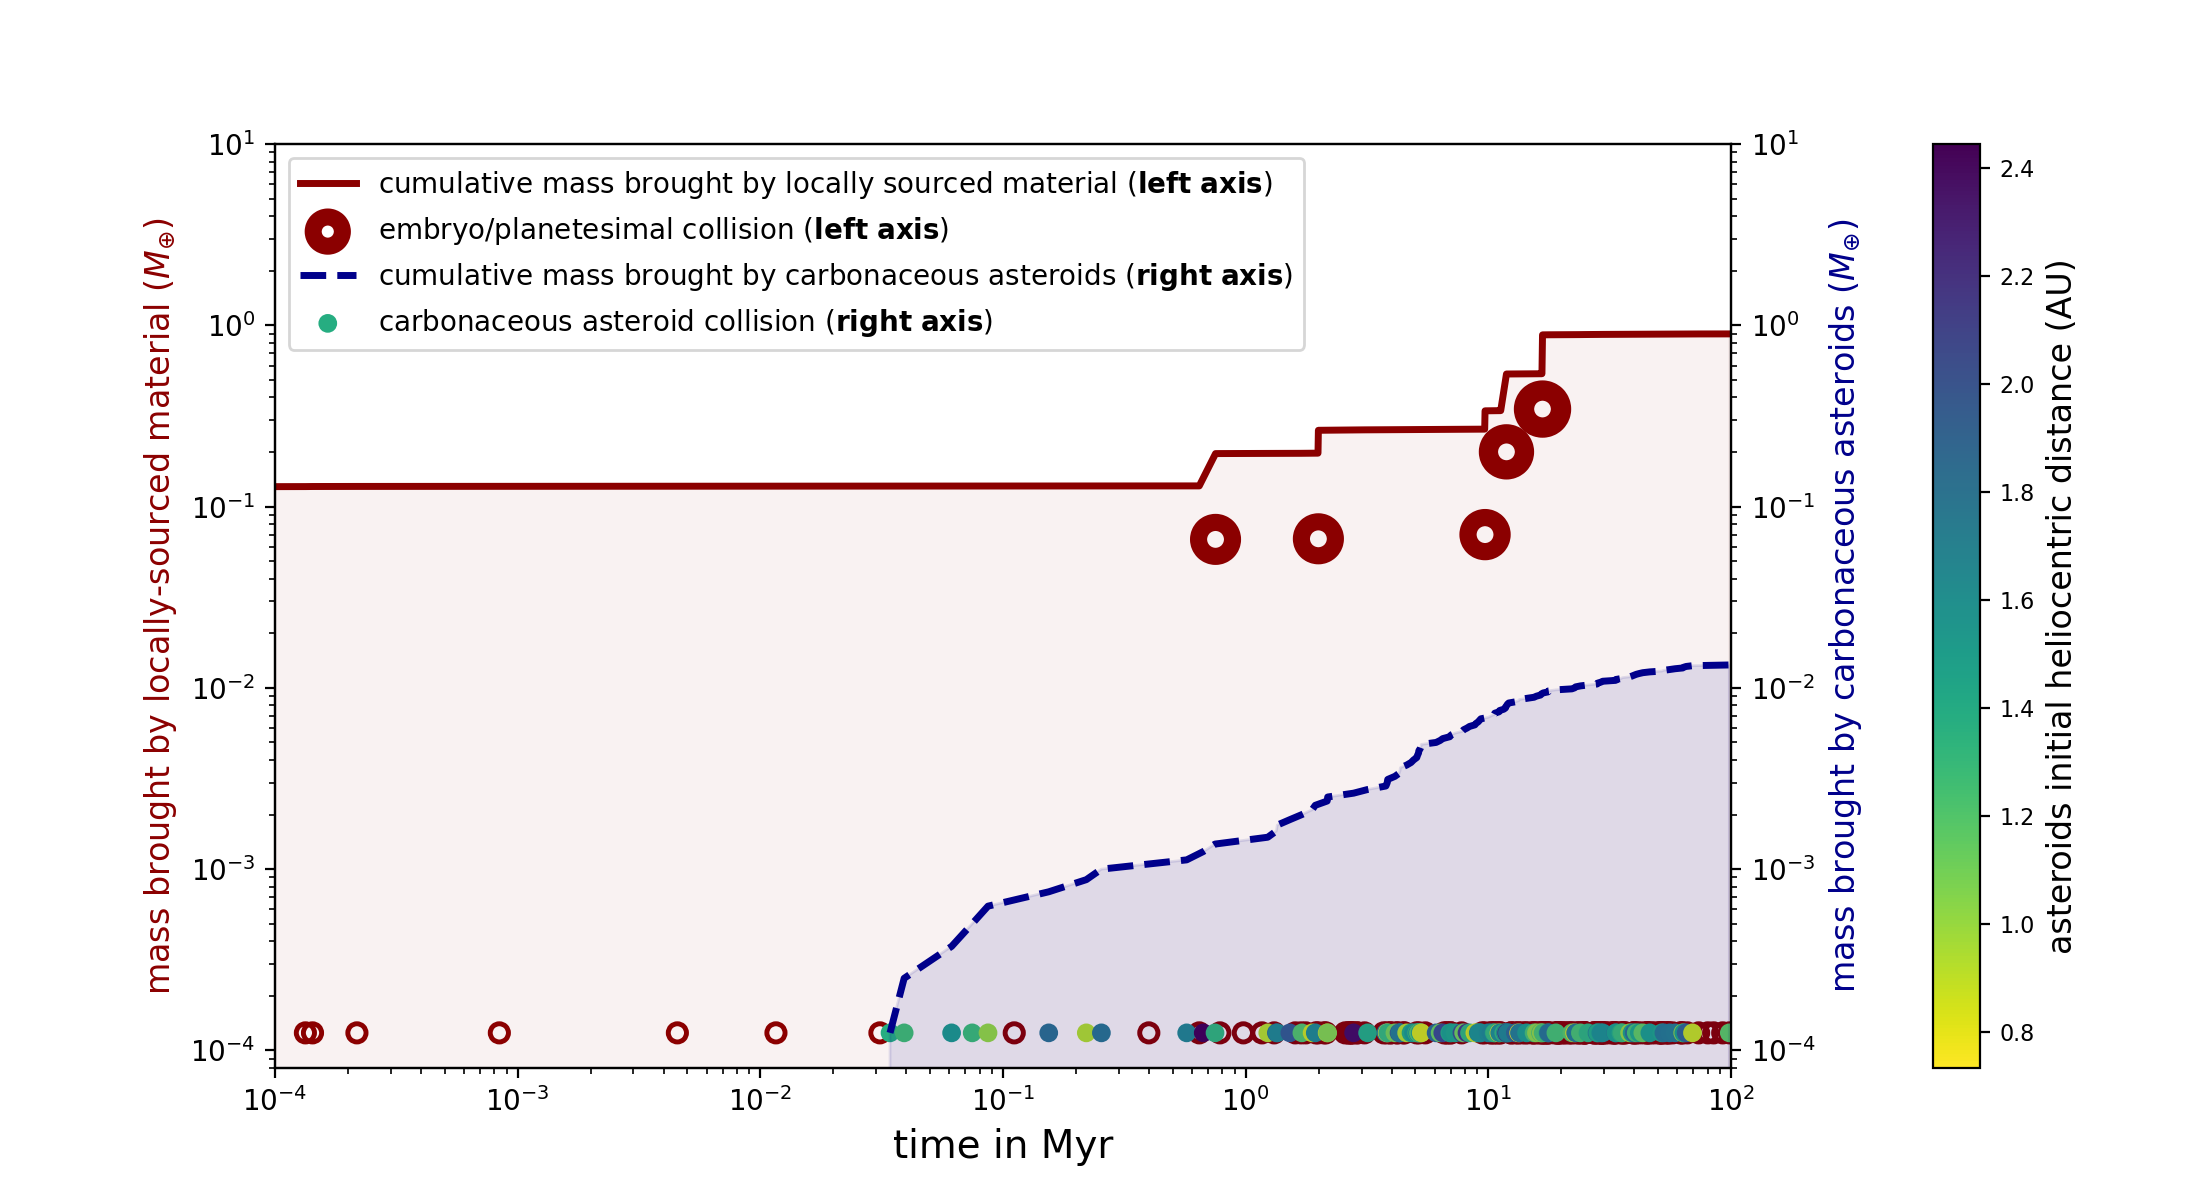

In [45]:
fig, [ax, dummy, cax] = plt.subplots(1,3, figsize=(11, 6),gridspec_kw=dict(width_ratios=[25,0.03, 0.8]))
dummy.axis('off')
ax.set_xlabel('time in Myr', fontsize=14)
ax.set_ylabel('mass brought by locally-sourced material ($M_{\oplus}$)', fontsize=12, color = "darkred")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4,1e2)
ax.set_ylim(8e-5,1e1)
#bax = brokenaxes(ylims=((1e-4, 5e-4), (1e-3, 1.4)), hspace=.05)
#ax.set_xlim(0.4, 100)
#ax.set_ylim(-0.05, 1.3)
    
# cumulative function of the masses
cum_pl = np.zeros(len(pl_time)) 
cum_as = np.zeros(len(as_time))
percentage = np.zeros(len(as_time))
for t in range(len(pl_time)-1):  
    cum_pl[0] = pl_mass[0]
    cum_pl[t+1] = cum_pl[t] + pl_mass[t+1]
for t in range(len(as_time)-1):  
    cum_as[0] = as_mass[0]
    cum_as[t+1] = cum_as[t] + as_mass[t+1]
    #timing_0 = np.round(as_time[0]/1e6, 2)
    #timing = np.round(as_time[t+1]/1e6, 2)   
    # Find the closest corresponding time for the planetesimal array
    #idx_pl0 = np.abs(pl_time/1e6 - timing_0).argmin()
    #idx_pl = np.abs(pl_time/1e6 - timing).argmin()
    # Percentage of C-type asteroid inside the Earth
    #percentage[0] = 100 * cum_as[0] / cum_pl[idx_pl0]
    #percentage[t+1] = 100 * cum_as[t+1] / cum_pl[idx_pl]

sc2 = ax.scatter(pl_time/1e6, pl_mass, facecolors='none', linewidth=0.7*np.log(pl_mass*1e5), edgecolors='darkred', s = 17*np.log(pl_mass*1e5), label = "embryo/planetesimal collision ($\\bf{left}$ $\\bf{axis}$)")
ln2 = ax.plot(pl_time/1e6, cum_pl, c = 'darkred', linewidth = 2.5, label = "cumulative mass brought by locally sourced material ($\\bf{left}$ $\\bf{axis}$)")
ax.fill_between(pl_time/1e6, cum_pl, color = 'darkred', alpha=.05)

# Twin axis
ax2=ax.twinx()
ax2.set_yscale('log')
#ax2.set_ylim(-0.0022, 0.06)
ax2.set_ylim(8e-5,1e1)
sc = ax2.scatter(as_time/1e6, as_mass, c=as_a, cmap='viridis_r', s= 13*np.log(as_mass*1e5), label = "carbonaceous asteroid collision ($\\bf{right}$ $\\bf{axis}$)")


ax2.fill_between(as_time/1e6, cum_as, color = 'darkblue', alpha=.1)
ax2.set_ylabel('mass brought by carbonaceous asteroids ($M_{\oplus}$)', fontsize=12, color='darkblue')
ln = ax2.plot(as_time/1e6, cum_as, c = 'darkblue', linewidth = 2.5, ls ='--', label = "cumulative mass brought by carbonaceous asteroids ($\\bf{right}$ $\\bf{axis}$)")

cb = plt.colorbar(sc, ax = ax2, cax = cax) #orientation = 'horizontal'
cb.set_label('asteroids initial heliocentric distance (AU)', fontsize=12)
cb.ax.tick_params(labelsize=8)


# Legend
#lns = ln2+ln
#labs = [l.get_label() for l in lns]
#ax.legend(lns, labs, loc="upper left")
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# Save fig
#plt.savefig('/Users/sarahjoiret/Desktop/sims/genga/case1_output/2/mass_a2.pdf', dpi=1000,bbox_inches='tight')

<IPython.core.display.Javascript object>


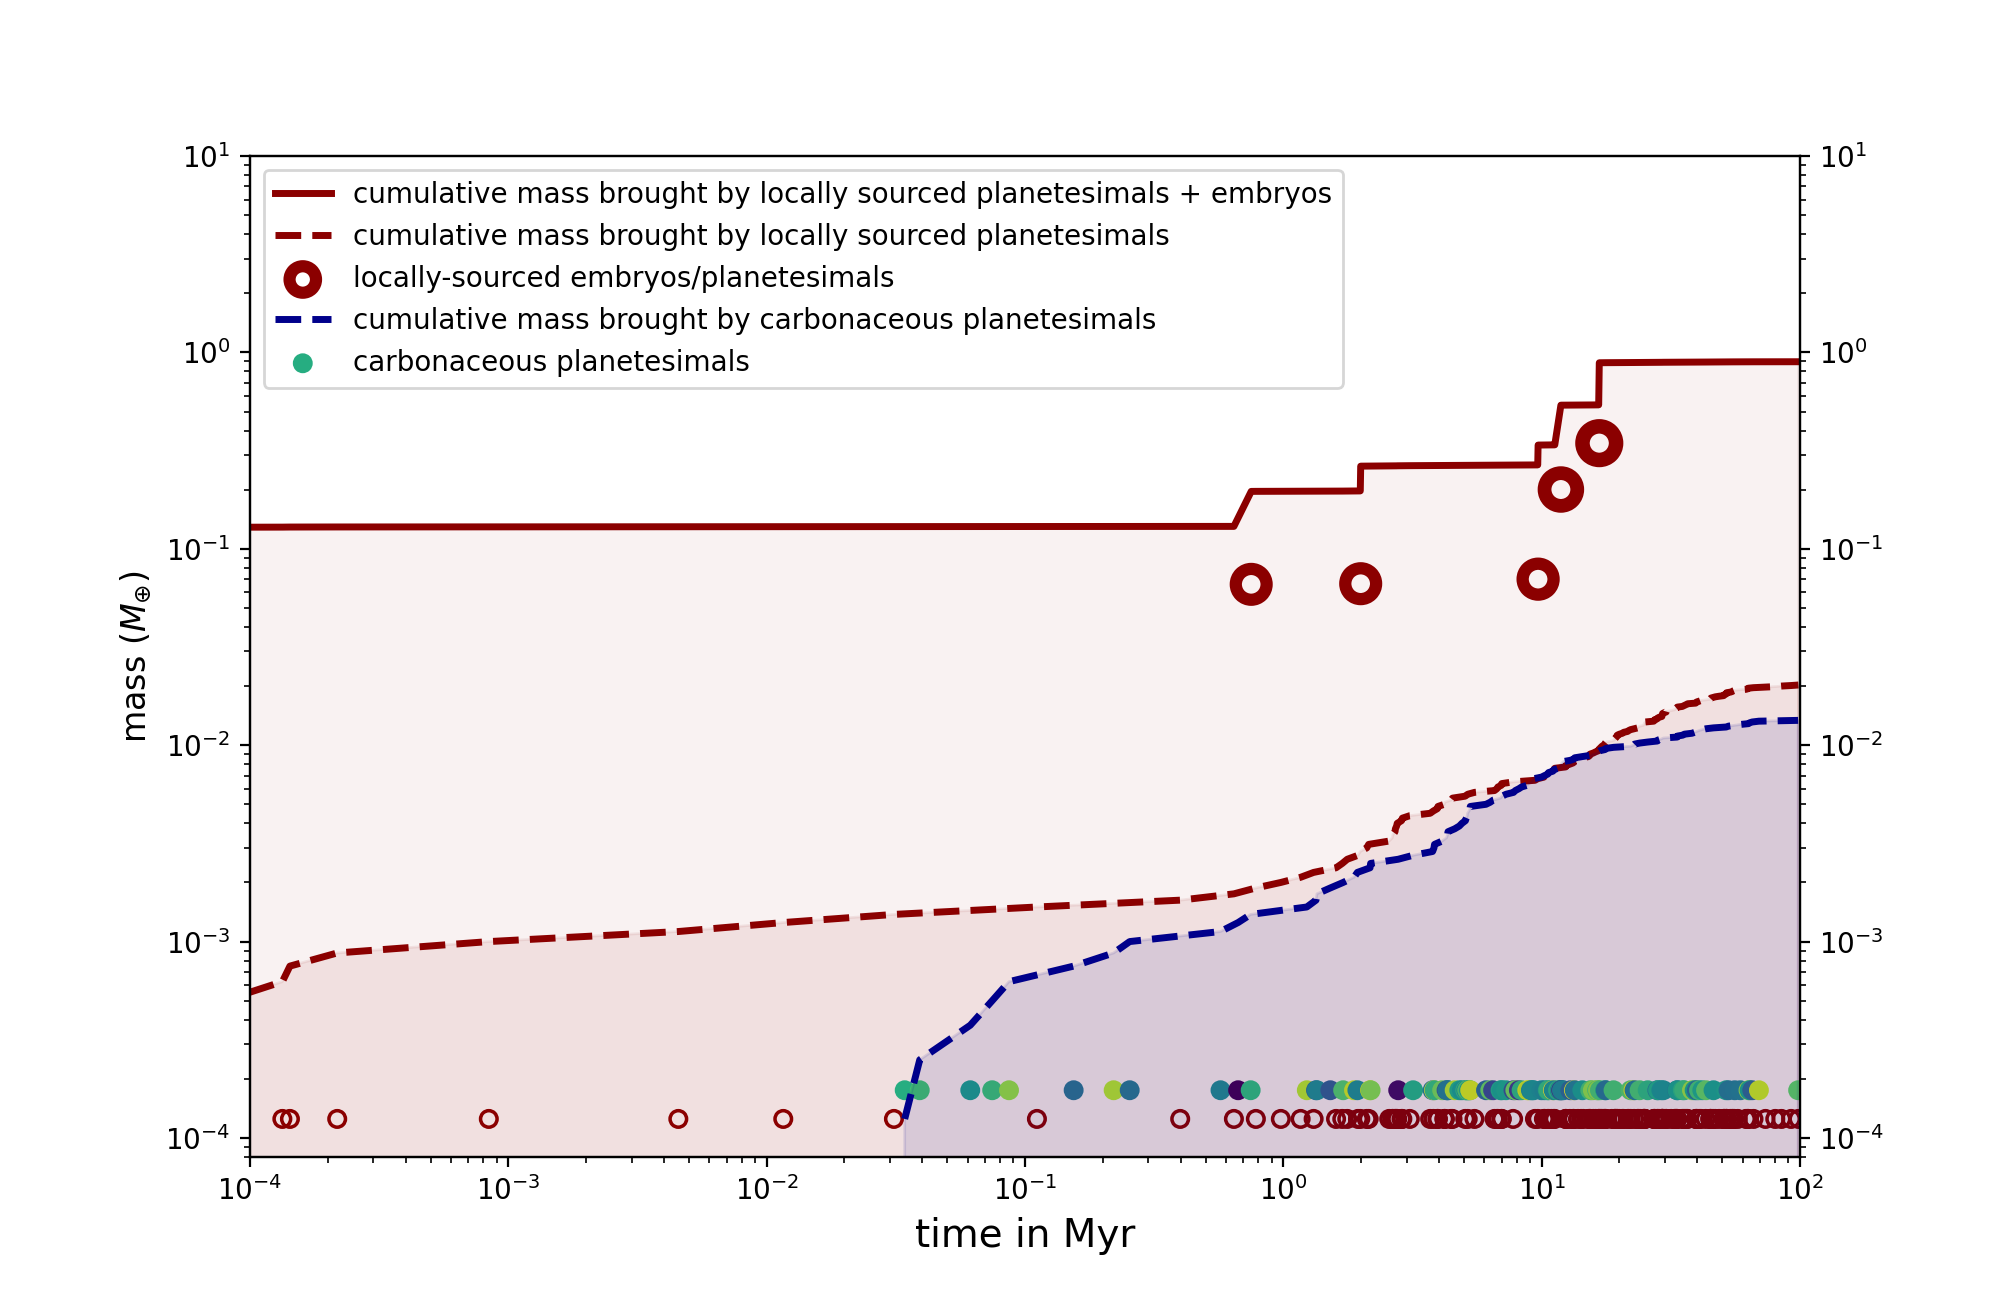

In [46]:
fig, ax = plt.subplots(figsize=(10, 6.5))

ax.set_xlabel('time in Myr', fontsize=14)
ax.set_ylabel('mass ($M_{\oplus}$)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4,1e2)
ax.set_ylim(8e-5,1e1)
    
# cumulative function of the masses
cum_spl = np.zeros(len(spl_time))
cum_pl = np.zeros(len(pl_time)) 
cum_as = np.zeros(len(as_time))

for t in range(len(spl_time)-1):  # small planetesimals 
    cum_spl[0] = spl_mass[0]
    cum_spl[t+1] = cum_spl[t] + spl_mass[t+1]
for t in range(len(pl_time)-1):  # planetesimals + embryos
    cum_pl[0] = pl_mass[0]
    cum_pl[t+1] = cum_pl[t] + pl_mass[t+1]
for t in range(len(as_time)-1):  
    cum_as[0] = as_mass[0]
    cum_as[t+1] = cum_as[t] + as_mass[t+1]

sc2 = ax.scatter(pl_time/1e6, pl_mass, facecolors='none', linewidth=0.5*np.log(pl_mass*1e5), edgecolors='darkred', s = 14*np.log(pl_mass*1e5), label = "locally-sourced embryos/planetesimals")
ln2 = ax.plot(pl_time/1e6, cum_pl, c = 'darkred', linewidth = 2.5, label = "cumulative mass brought by locally sourced planetesimals + embryos")
ln3 = ax.plot(spl_time/1e6, cum_spl, c = 'darkred', linewidth = 2.5, ls ='--', label = "cumulative mass brought by locally sourced planetesimals")
ax.fill_between(pl_time/1e6, cum_pl, color = 'darkred', alpha=.05)
ax.fill_between(spl_time/1e6, cum_spl, color = 'darkred', alpha=.07)

# Twin axis
ax2=ax.twinx()
ax2.set_yscale('log')
#ax2.set_ylim(-0.0022, 0.06)
ax2.set_ylim(8e-5,1e1)
sc = ax2.scatter(as_time/1e6, as_mass*1.4, c=as_a, cmap='viridis_r', s= 15*np.log(as_mass*1e5), label = "carbonaceous planetesimals")
ln = ax2.plot(as_time/1e6, cum_as, c = 'darkblue', linewidth = 2.5, ls ='--', label = "cumulative mass brought by carbonaceous planetesimals")
ax2.fill_between(as_time/1e6, cum_as, color = 'darkblue', alpha=.1)
#ax2.set_ylabel('mass brought by carbonaceous asteroids ($M_{\oplus}$)', fontsize=12, color='darkblue')

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# Save fig
#plt.savefig('/Users/sarahjoiret/Desktop/sims/genga/case1_output/2/mass_a2bis.pdf', dpi=1000,bbox_inches='tight')
#plt.savefig('/Users/sarahjoiret/Desktop/sims/genga/case1_output/20/mass_a20.pdf', dpi=1000,bbox_inches='tight')

<IPython.core.display.Javascript object>


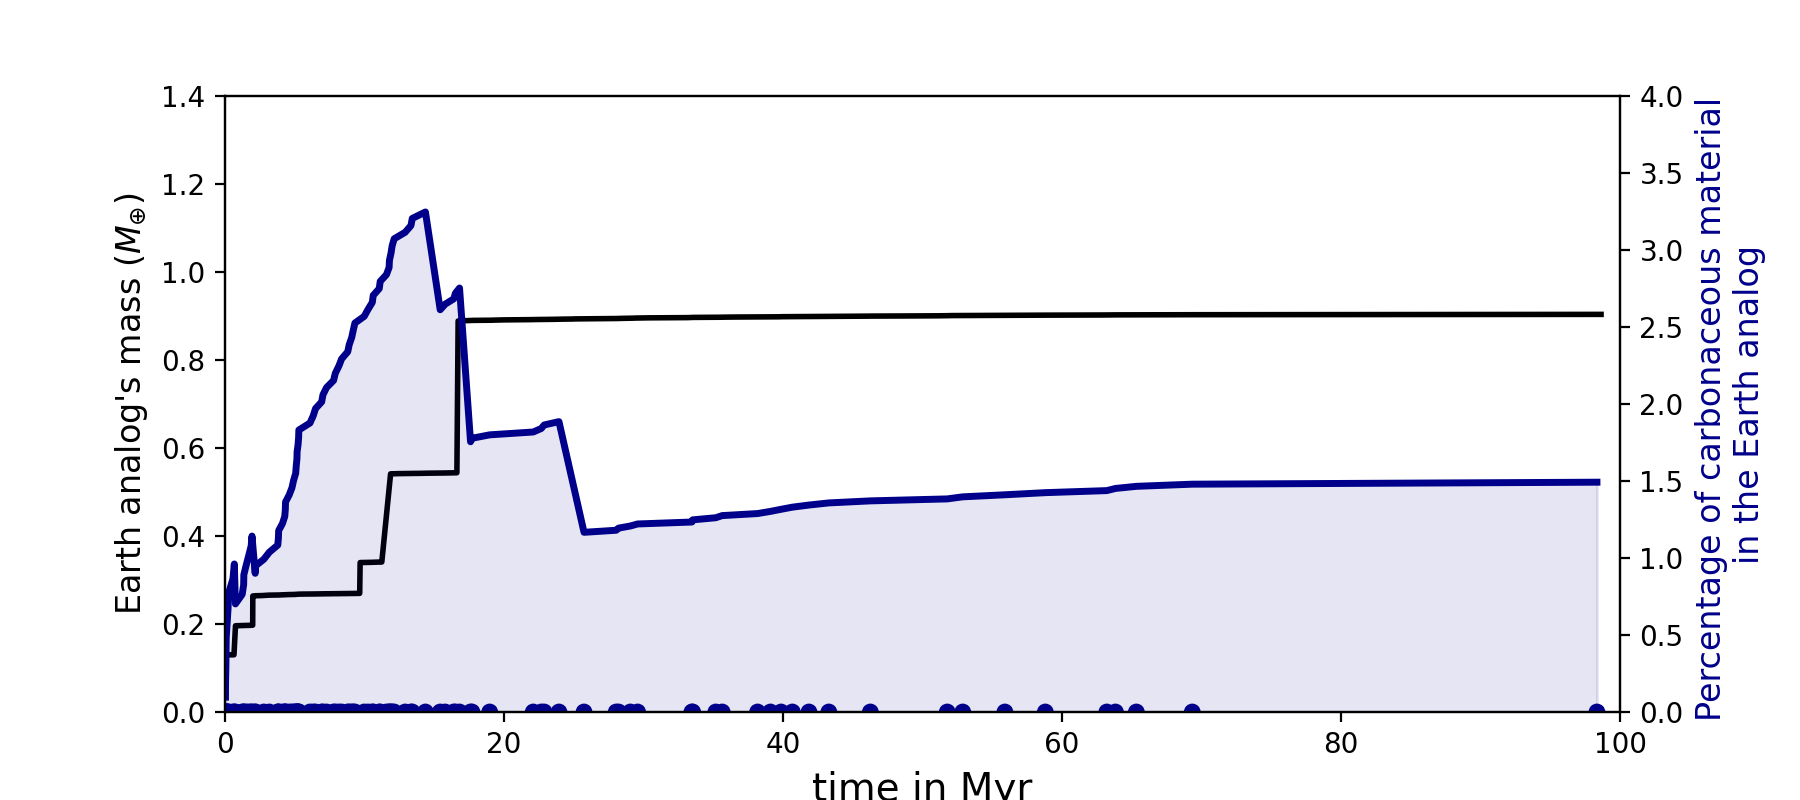

In [47]:
# Le problème de ce graphe est qu'il prend en compte les collisions des astéroides 
# qui collisionnent des planétésimaux, avant que ceux ci ne fassent partie de la Terre
fig, ax = plt.subplots(figsize=(9, 4))
#fig.subplots_adjust(hspace=0)
#plt.xlim(0, 100)
ax.set_xlabel('time in Myr', fontsize=14)
ax.set_ylabel("Earth analog's mass ($M_{\oplus}$)", fontsize=12, color = "black")
ax.set_xlim(0, 100)
ax.set_ylim(0.0, 1.4)
#ax.set_ylim(0.935, 0.985)
    
# cumulative function of the masses
cum_Etot = np.zeros(len(Etot_time))
cum_pl = np.zeros(len(pl_time))
cum_as = np.zeros(len(as_time))
percentage_pl = np.zeros(len(pl_time))
percentage_as = np.zeros(len(as_time))

for t in range(len(Etot_time)-1):  
    cum_Etot[0] = Etot_mass[0]
    cum_Etot[t+1] = cum_Etot[t] + Etot_mass[t+1]
    
for t in range(len(pl_time)-1):  
    cum_pl[0] = pl_mass[0]
    cum_pl[t+1] = cum_pl[t] + pl_mass[t+1]
    
    timing_0 = np.round(pl_time[0]/1e6, 2)
    timing = np.round(pl_time[t+1]/1e6, 2) 
    # Find the closest corresponding time for the total Earth array
    idx_Et0 = np.abs(Etot_time/1e6 - timing_0).argmin()
    idx_Et = np.abs(Etot_time/1e6 - timing).argmin()
    # Percentage of planetesimals inside the Earth
    percentage_pl[0] = 100 * cum_pl[0] / cum_Etot[idx_Et0]
    percentage_pl[t+1] = 100 * cum_pl[t+1] / cum_Etot[idx_Et]
    
for t in range(len(as_time)-1):  
    cum_as[0] = as_mass[0]
    cum_as[t+1] = cum_as[t] + as_mass[t+1]
    timing_0 = np.round(as_time[0]/1e6, 2)
    timing = np.round(as_time[t+1]/1e6, 2)   
    # Find the closest corresponding time for the planetesimal array
    idx_Et0 = np.abs(pl_time/1e6 - timing_0).argmin()
    idx_Et = np.abs(pl_time/1e6 - timing).argmin()
    # Percentage of C-type asteroid inside the Earth
    percentage_as[0] = 100 * cum_as[0] / cum_Etot[idx_Et0]
    percentage_as[t+1] = 100 * cum_as[t+1] / cum_Etot[idx_Et]


ax.plot(Etot_time/1e6, cum_Etot, c = 'black', linewidth = 2.0)
#ax.legend()

ax2=ax.twinx()
ax2.set_ylim(0, 4)
ax2.scatter(as_time/1e6, as_mass, c = 'darkblue', s= 10*np.log(as_mass*1e5), label = "C-type asteroid collision")
ax2.plot(as_time/1e6, percentage_as, c = 'darkblue', linewidth = 2.5)
ax2.fill_between(as_time/1e6, percentage_as, color = 'darkblue', alpha=.1)
#ax2.scatter(pl_time/1e6, pl_mass, c = 'darkblue', s= 10*np.log(pl_mass*1e5), label = "Planetesimal collision")
#ax2.plot(pl_time/1e6, percentage_pl, c = 'darkblue', linewidth = 2.5)
#ax2.fill_between(pl_time/1e6, percentage_pl, color = 'darkblue', alpha=.1)
ax2.set_ylabel('Percentage of carbonaceous material \nin the Earth analog', fontsize=12, color = 'darkblue')
#ax2.legend()
plt.savefig('/Users/sarahjoiret/Desktop/sims/genga/case1_output/13/percentage_CC.pdf', dpi=1000,bbox_inches='tight')